# **Importing Some Basic Libraries**

In [17]:
import sys, os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import resample

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor



import warnings
warnings.filterwarnings("ignore")

import random
random.seed(10)
print(random.random())

0.5714025946899135


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Importing Data**

In [18]:
data = R'breastcancer_data.csv'
risk_df = pd.read_csv(data)

In [19]:
risk_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [20]:
risk_df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
1133,93316,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623
1134,93317,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533
1135,93318,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648
1136,93319,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016
1137,93320,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.1587,0.05884


## **Descriptive Analysis of the dataset**

In [39]:
print("Size of Breast Cancer dataset       : {}".format(risk_df.shape))

Size of Breast Cancer dataset       : (1138, 10)


In [22]:
risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1138 non-null   int64  
 1   diagnosis               1138 non-null   object 
 2   radius_mean             1138 non-null   float64
 3   texture_mean            1138 non-null   float64
 4   perimeter_mean          1138 non-null   float64
 5   area_mean               1138 non-null   float64
 6   smoothness_mean         1138 non-null   float64
 7   compactness_mean        1138 non-null   float64
 8   concavity_mean          1138 non-null   float64
 9   symmetry_mean           1138 non-null   float64
 10  fractal_dimension_mean  1138 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 97.9+ KB


In [23]:
risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1138.0,1.523243e+07,8.965268e+07,8670.00000,92995.25000,93279.50000,906012.50000,9.113205e+08
radius_mean,1138.0,1.412729e+01,3.522499e+00,6.98100,11.70000,13.37000,15.78000,2.811000e+01
texture_mean,1138.0,1.928965e+01,4.299144e+00,9.71000,16.17000,18.84000,21.80000,3.928000e+01
perimeter_mean,1138.0,9.196903e+01,2.428829e+01,43.79000,75.17000,86.24000,104.10000,1.885000e+02
area_mean,1138.0,6.548891e+02,3.517593e+02,143.50000,420.30000,551.10000,782.70000,2.501000e+03
smoothness_mean,1138.0,9.636028e-02,1.405794e-02,0.05263,0.08637,0.09587,0.10530,1.634000e-01
compactness_mean,1138.0,1.043410e-01,5.278953e-02,0.01938,0.06492,0.09263,0.13040,3.454000e-01
concavity_mean,1138.0,8.879932e-02,7.968474e-02,0.00000,0.02956,0.06154,0.13070,4.268000e-01
symmetry_mean,1138.0,1.811619e-01,2.740222e-02,0.10600,0.16190,0.17920,0.19570,3.040000e-01
fractal_dimension_mean,1138.0,6.279761e-02,7.057257e-03,0.04996,0.05770,0.06154,0.06612,9.744000e-02


## **Checking NaN Values:**

In [24]:
risk_df.isna().sum()                                        # Checking missing values

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

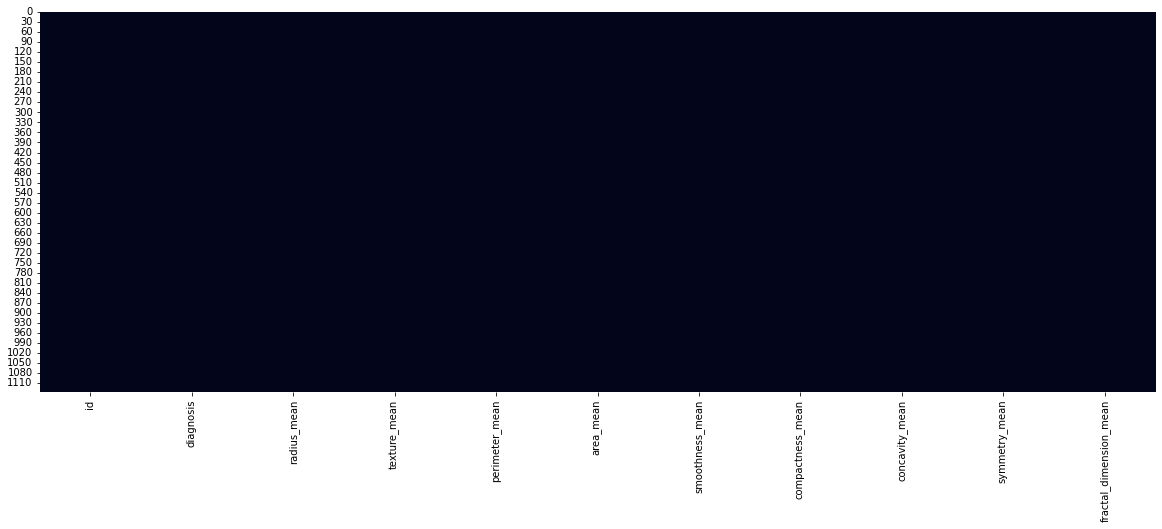

In [25]:
plt.figure(figsize=(20, 7))
sns.heatmap(risk_df.isnull(), cbar=False)                   # plotting heatmap using sns library to find missing values in train_df
plt.show()

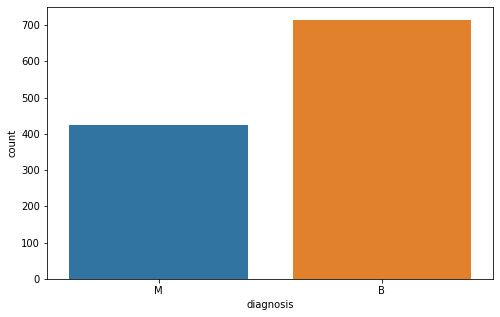

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='diagnosis', data=risk_df, order=['M', 'B'] )

Our Data is imbalanced.
*   Either we need to balance it using upsampling or downsampling.
*   Or we need to use StratifiedShuffleSplit while splitting our dataset it into training and testing set.

## **Processing Categorical value**

In [27]:
risk_df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [28]:
# Perform Encoding by coverting features into numerical form
diagnosis_map = {'M':0, 'B':1}
    
risk_df["diagnosis"] = risk_df['diagnosis'].map(diagnosis_map)
risk_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


# Dropping id Column:

In [30]:
risk_df.drop(['id'], axis=1, inplace=True)
risk_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


# Visualization/Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6f703e650>,
      dtype=object)

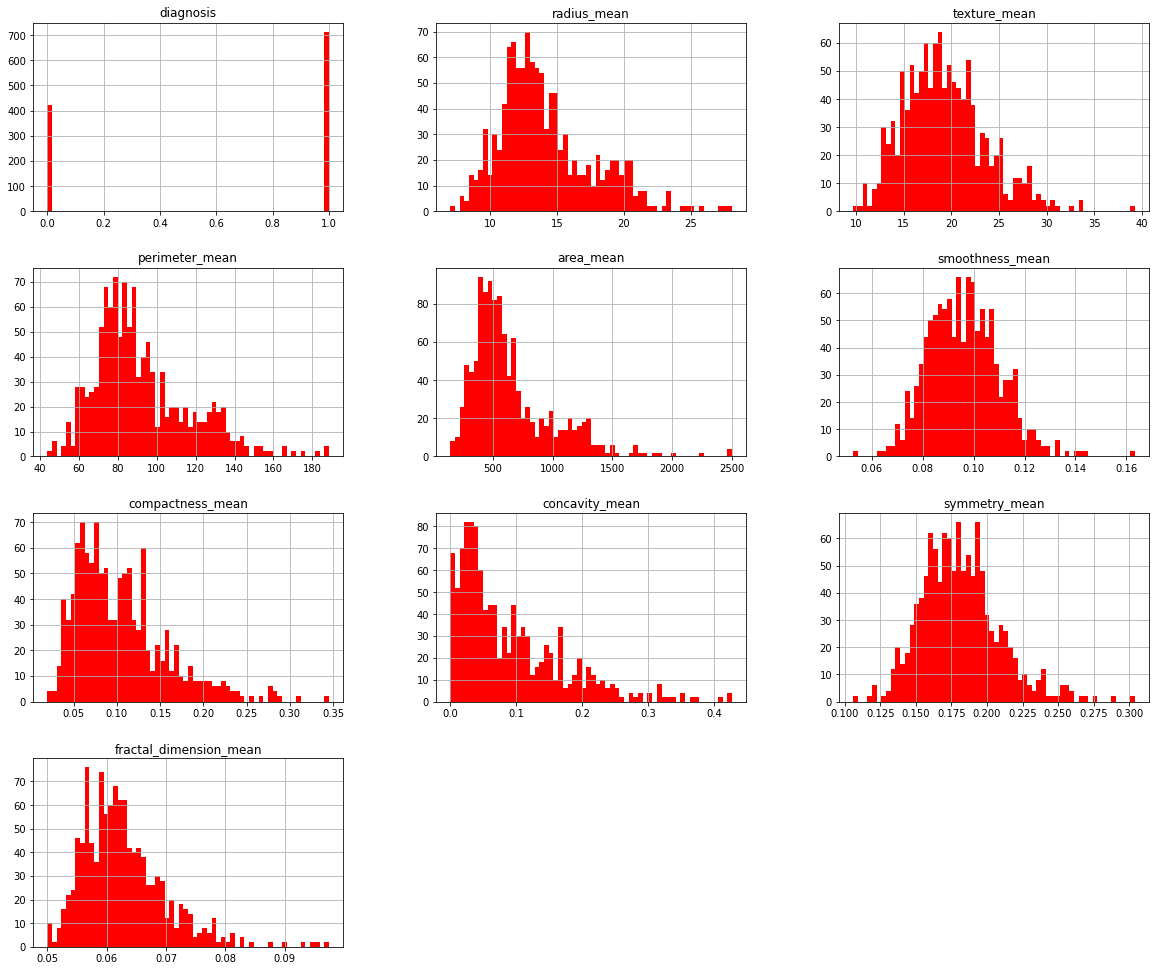

In [31]:
risk_df.hist(bins = 60, figsize = (20,17), color='red')

# **Normailization:**

In [71]:
train_X_df = (risk_df.iloc[:,1:]-risk_df.iloc[:,1:].mean())/risk_df.iloc[:,1:].std()
train_X_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,1.096582,-2.072424,1.269376,0.983942,1.567777,3.282072,2.651708,2.216540,2.254756
1,1.829016,-0.353477,1.685214,1.907869,-0.826599,-0.486858,-0.023835,0.001392,-0.868271
2,1.579194,0.455986,1.565815,1.558199,0.941796,1.052463,1.362879,0.939272,-0.397833
3,-0.768571,0.253621,-0.592427,-0.764128,3.282110,3.401414,1.915055,2.866123,4.908761
4,1.749527,-1.151310,1.775792,1.825427,0.280249,0.539103,1.370409,-0.009556,-0.562203


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6f01ba790>,
      dtype=object)

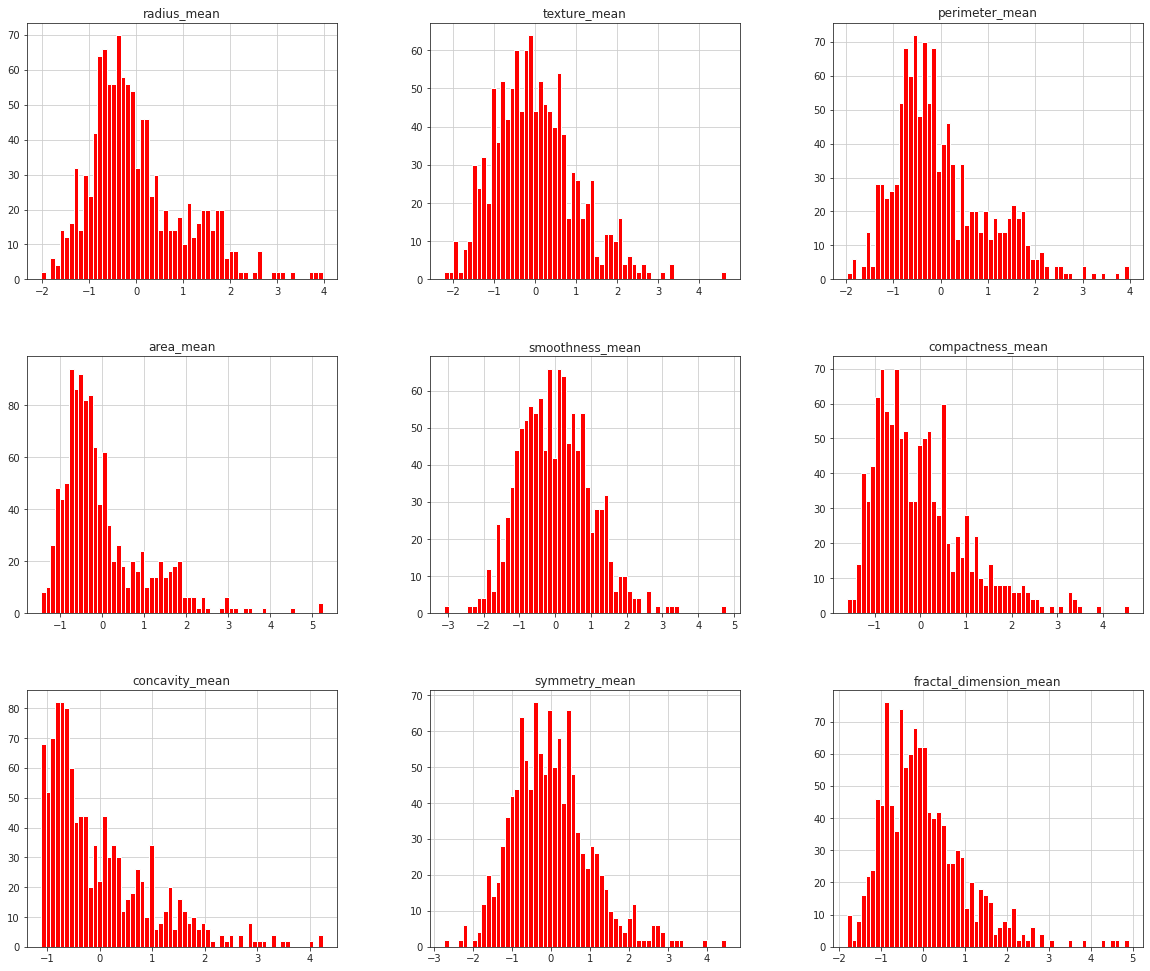

In [72]:
train_X_df.hist(bins = 60, figsize = (20,17), color='red')

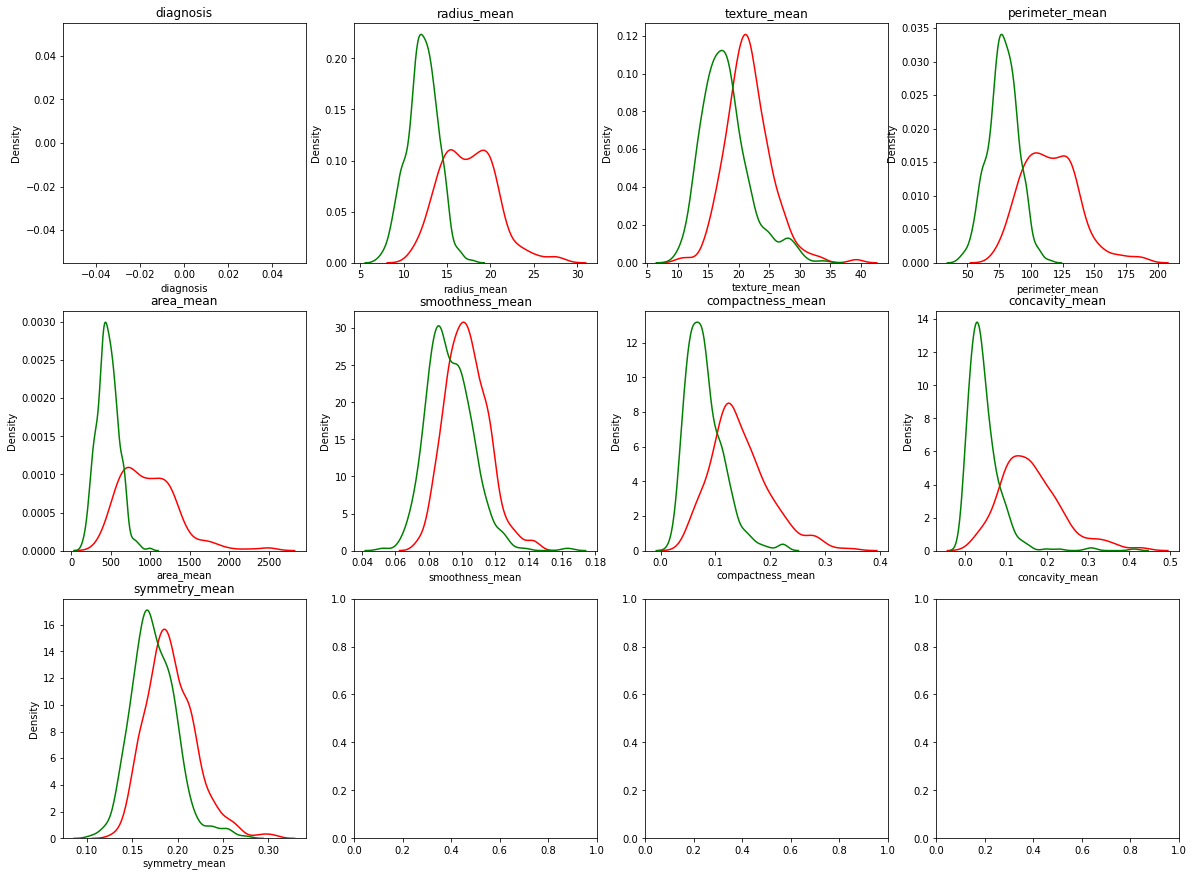

In [35]:
plt.subplots(3,4,figsize=(20,15))
for i in range(1,10):
    plt.subplot(3,4,i)
    plt.title(risk_df.columns[i-1])
    sns.kdeplot(risk_df.loc[risk_df['diagnosis'] == 0, risk_df.columns[i-1]], color= 'red', label="M")
    sns.kdeplot(risk_df.loc[risk_df['diagnosis'] == 1, risk_df.columns[i-1]], color= 'green', label="B")

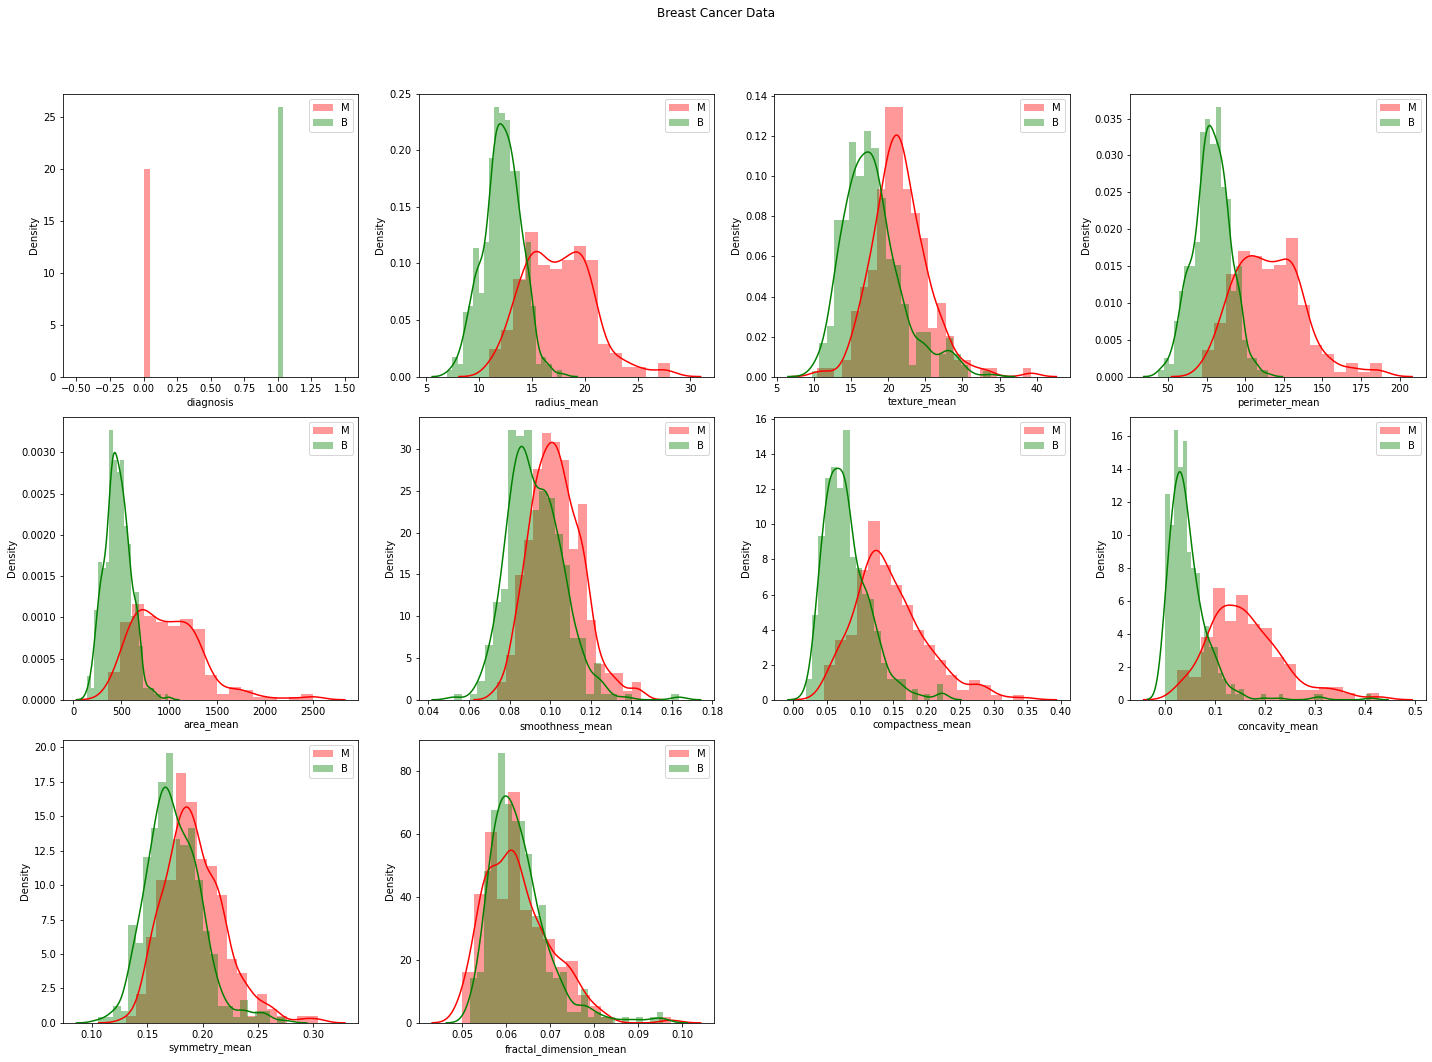

In [36]:
fig = plt.figure(figsize = (20, 15))
j = 0
for i in risk_df.columns:
    plt.subplot(3, 4, j+1)
    j += 1
    sns.distplot(risk_df[i][risk_df['diagnosis']==0], color= 'red', label="M")
    sns.distplot(risk_df[i][risk_df['diagnosis']==1], color='g', label = 'B')
    plt.legend(loc='best')
fig.suptitle('Breast Cancer Data')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

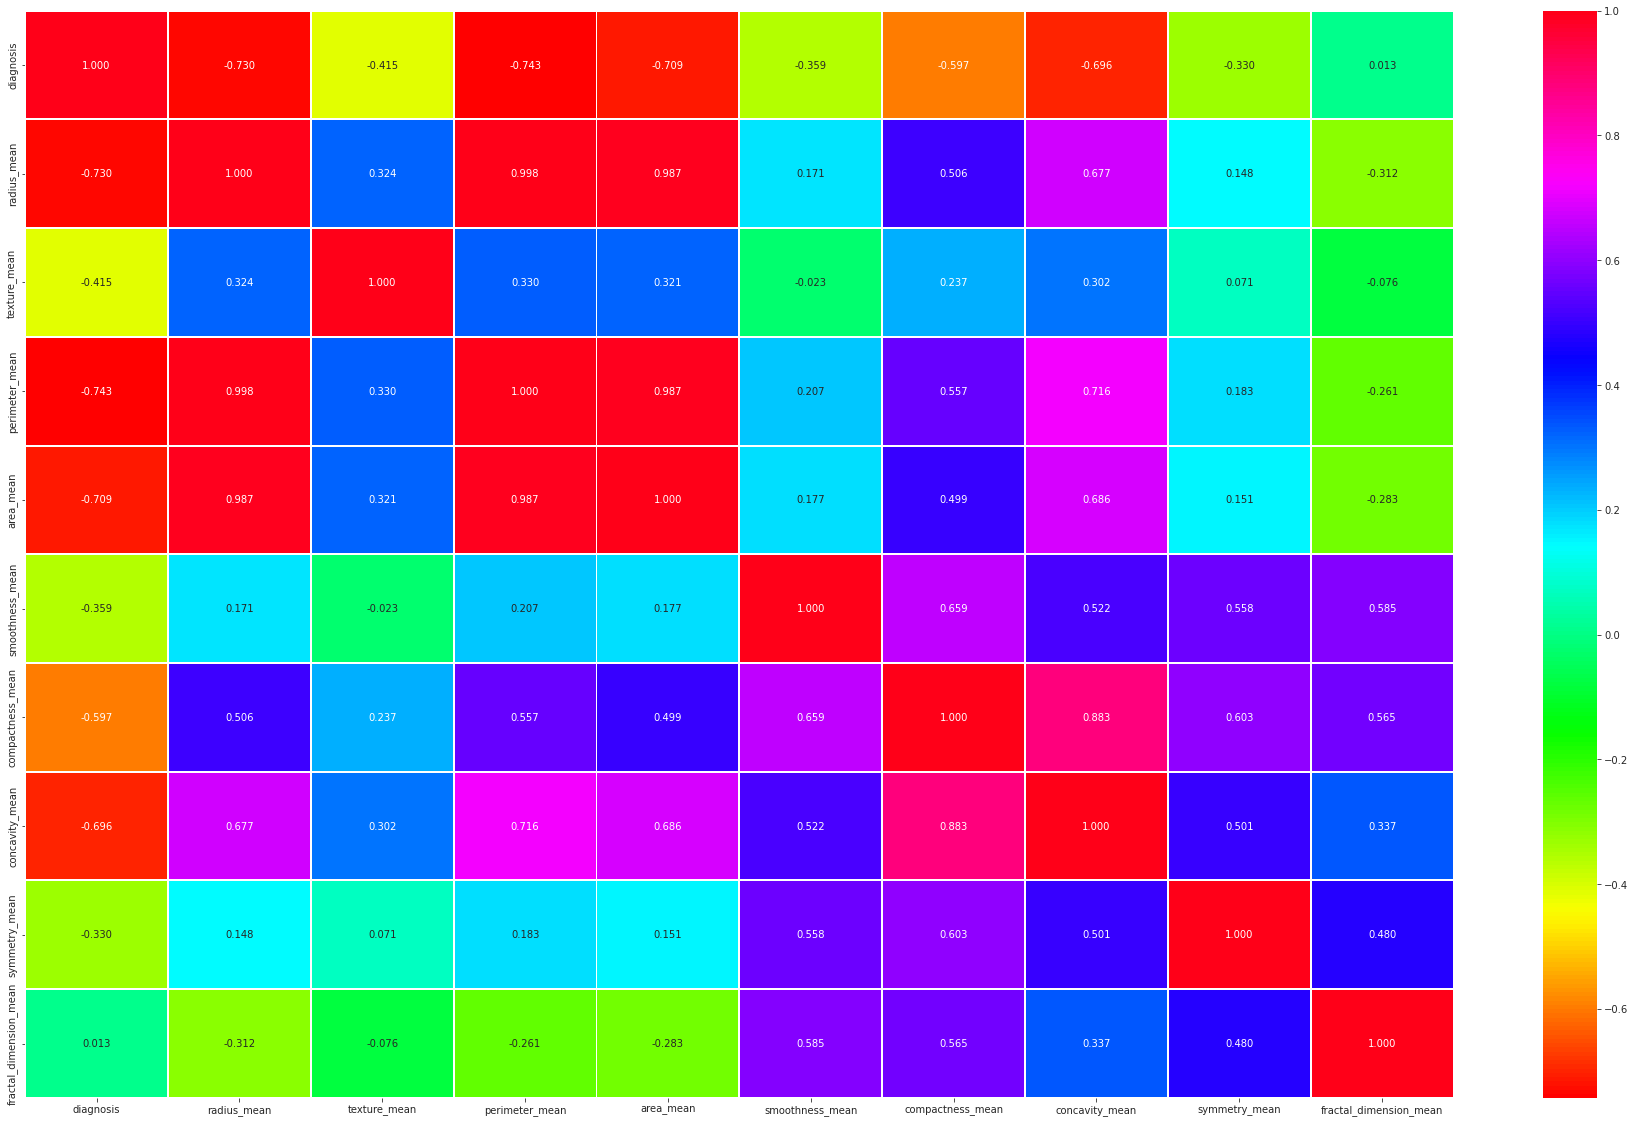

In [37]:
corr_data = risk_df.corr()                              # calculating correlation data between features
plt.figure(figsize=(32, 20))                            # setting figure size
sns.set_style('ticks')                                  # setting plot style
sns.heatmap(corr_data, cmap='hsv',annot=True,fmt='.3f',linewidths=1)       # plotting heatmap using sns library
plt.show()

# **Features Rank and bar:**

## Features Bar

### By Correlation coefficient

Text(0, 0.5, 'Features')

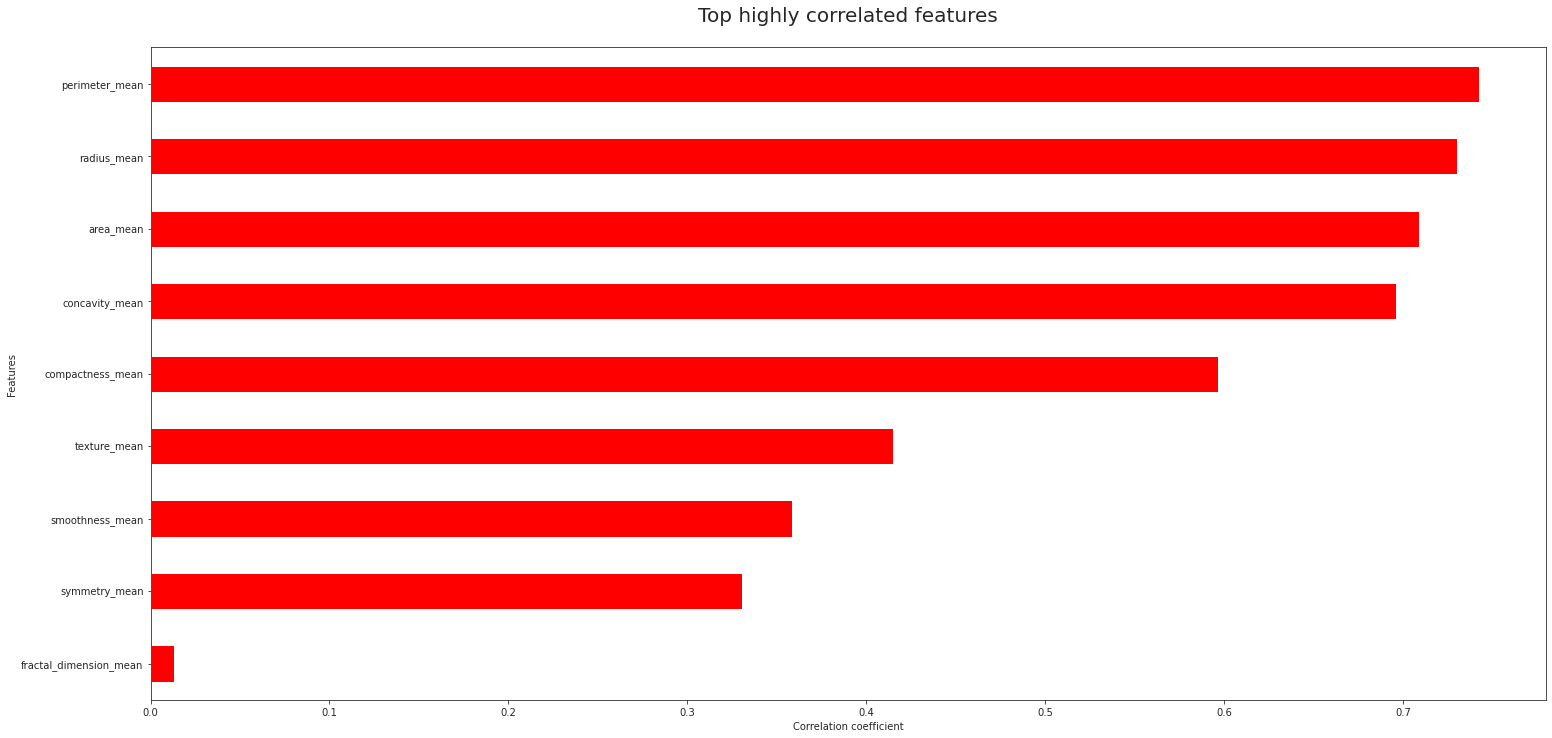

In [38]:
top_features_by_corr = corr_data['diagnosis'].apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:16][::-1]
plt.figure(figsize=(25,12))
top_features_by_corr.plot(kind='barh',color='red')
# calculating highest correlated features
# with respect to target variable i.e. "Landslide"
plt.title("Top highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

## **Checking unwanted Symbols in place of value :**

In [15]:
for i in full_df.columns:
    print(full_df[full_df[i] == ('?','!','na')])

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, symmetry_mean, fractal_dimension_mean]
Index: []
Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, symmetry_mean, fractal_dimension_mean]
Index: []
Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, symmetry_mean, fractal_dimension_mean]
Index: []
Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, symmetry_mean, fractal_dimension_mean]
Index: []
Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, symmetry_mean, fractal_dimension_mean]
Index: []
Empty DataFrame
Columns: 

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:69: FutureWarning:

# **Analysis of Target Variable**

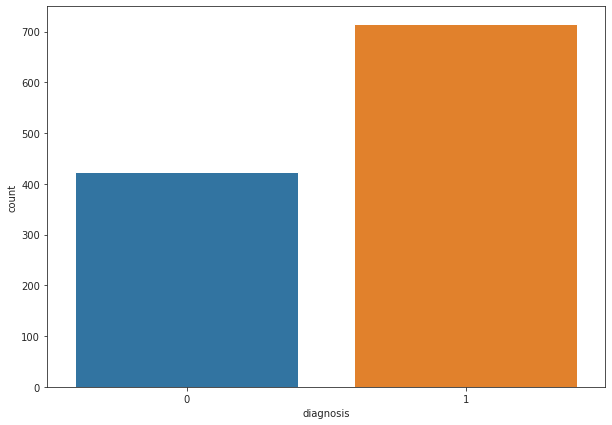

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x='diagnosis', data=risk_df, order=[0, 1] )

In [41]:
risk_df['diagnosis'].value_counts()                  # Prints the count of different classes in 'diagnosis'

1    714
0    424
Name: diagnosis, dtype: int64

**Hence, We found that our data is imbalanced.**

In [43]:
full_df_benign = risk_df[risk_df.diagnosis==1]              # MAJORITY
full_df_malignant = risk_df[risk_df.diagnosis==0]           # MINORITY

# **Upsampling**

In [45]:
# Upsample MINORITY Class to make balance data :
full_df_malignant_upsampled = resample(full_df_malignant, replace=True, n_samples=714, random_state=8) 

In [47]:
# Combine downsampled majority class with upsampled minority class
Balanced_full_df = pd.concat([full_df_malignant_upsampled, full_df_benign]).reset_index(drop=True)
 
# Display new class counts
Balanced_full_df.diagnosis.value_counts()           # Prints the count of different classes in 'diagnosis'

0    714
1    714
Name: diagnosis, dtype: int64

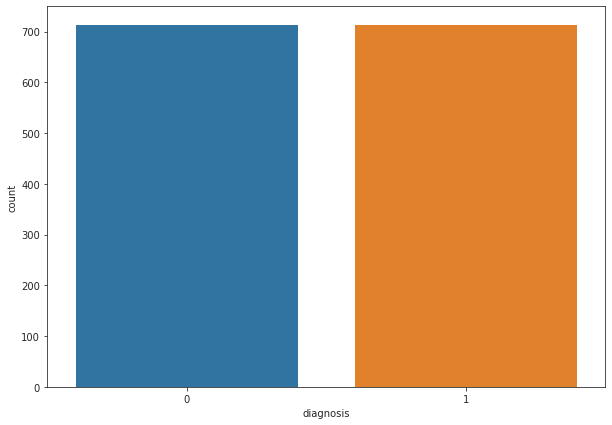

In [49]:
plt.figure(figsize=(10,7))
sns.countplot(x='diagnosis', data=Balanced_full_df, order=[0, 1] )

In [50]:
Balanced_full_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,0,13.96,17.05,91.43,602.4,0.1096,0.12790,0.09789,0.1908,0.06130
1,0,20.16,19.66,131.10,1274.0,0.0802,0.08564,0.11550,0.1928,0.05096
2,0,20.31,27.06,132.90,1288.0,0.1000,0.10880,0.15190,0.1814,0.05572
3,0,15.61,19.38,100.00,758.6,0.0784,0.05616,0.04209,0.1547,0.05443
4,0,19.45,19.33,126.50,1169.0,0.1035,0.11880,0.13790,0.1776,0.05647


# **Correlation Matrix and Heat Map**

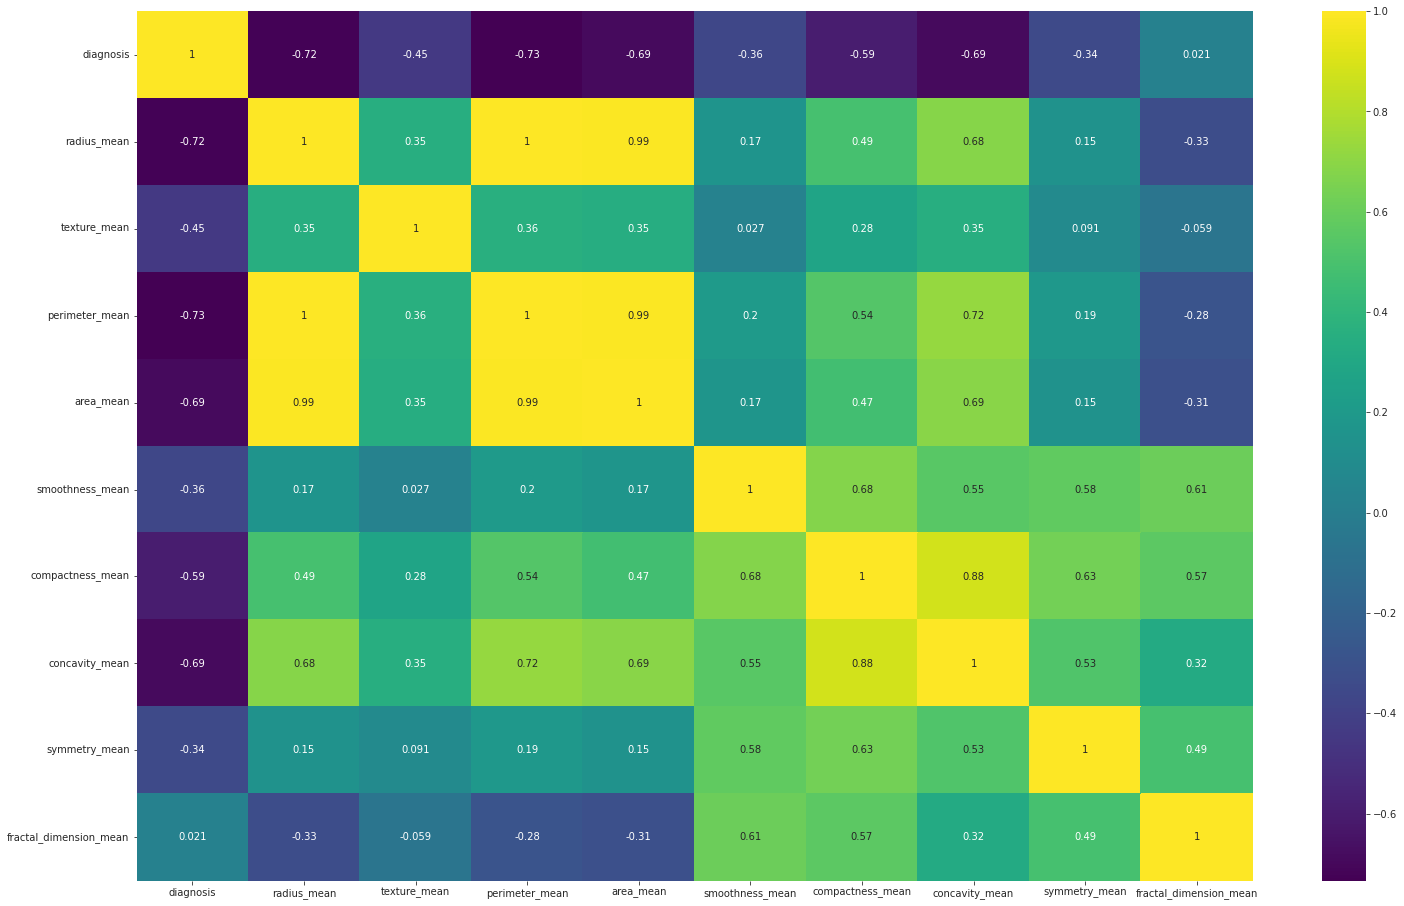

In [51]:
corr_data = Balanced_full_df.corr()                     # calculating correlation data between features
plt.figure(figsize=(25, 16))                            # setting figure size
sns.set_style('ticks')                                  # setting plot style
sns.heatmap(corr_data, cmap='viridis',annot=True)       # plotting heatmap using sns library
plt.show()

Text(0, 0.5, 'Features')

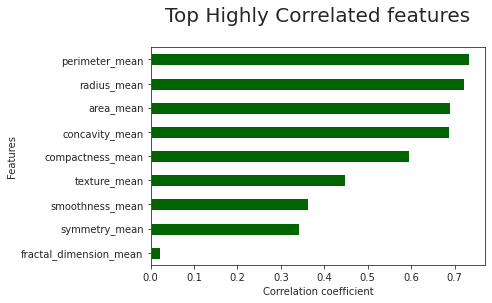

In [52]:
corr_data.diagnosis.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:10][::-1].plot(kind='barh',color='darkgreen') 
# calculating top highest correlated features
# with respect to target variable i.e. "Class"
plt.title("Top Highly Correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

# **Perform Analysis on Selected Features:**

In [53]:
import warnings 
warnings.filterwarnings('ignore')

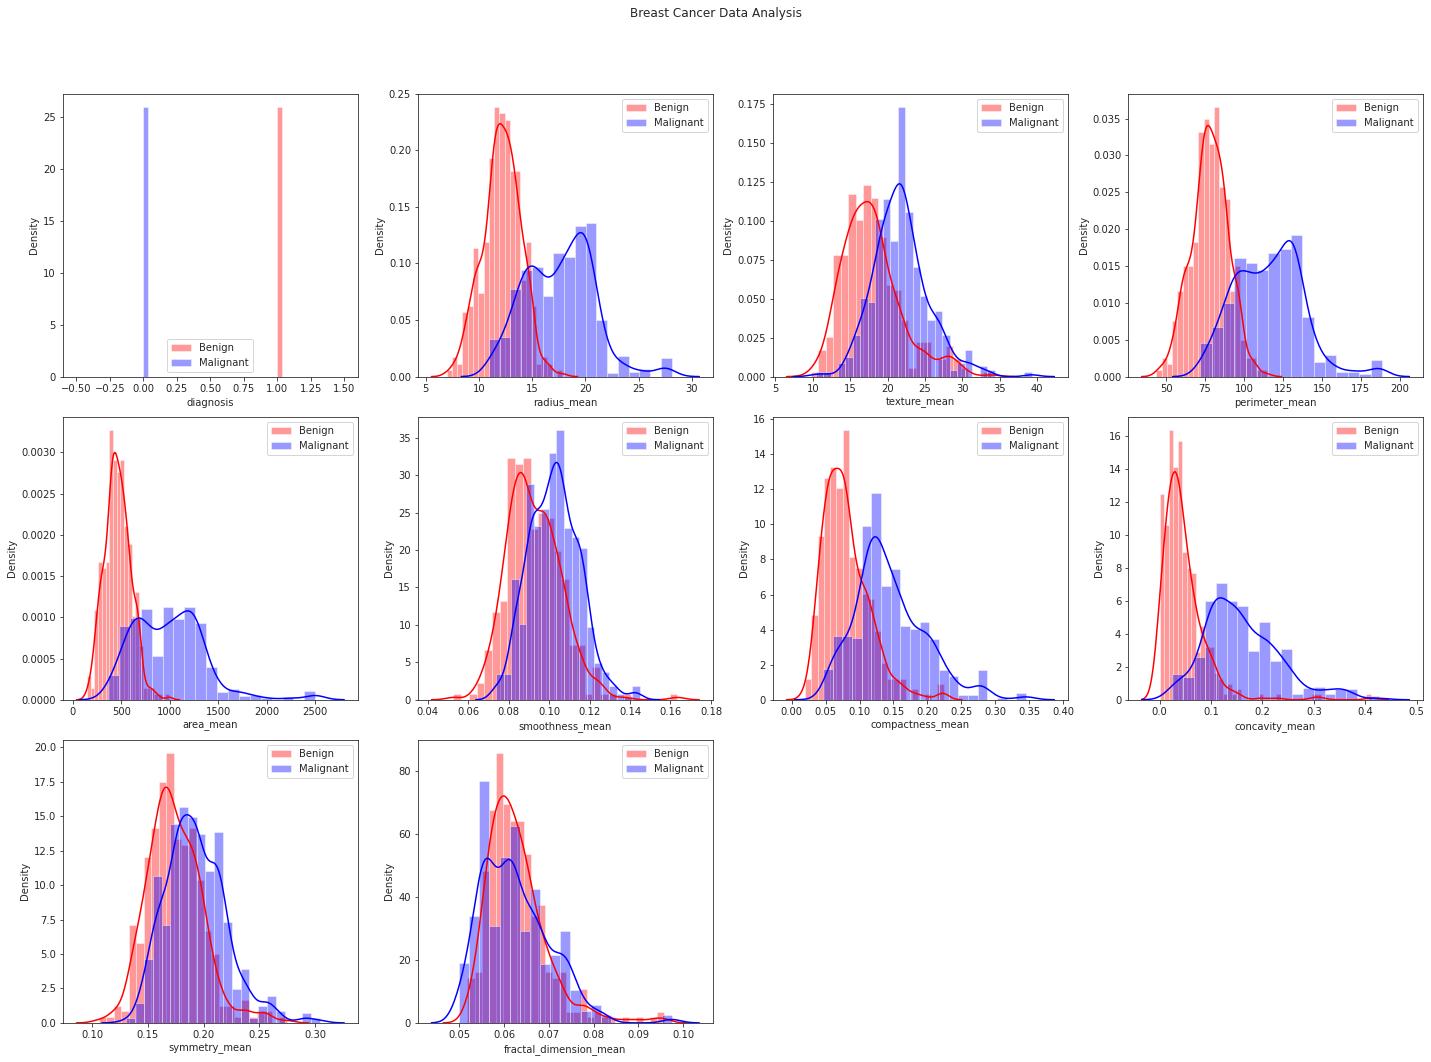

In [56]:
fig = plt.figure(figsize = (20, 15))
j = 0
for i in risk_df.columns:
    plt.subplot(3, 4, j+1)
    j += 1
    sns.distplot(Balanced_full_df[i][Balanced_full_df['diagnosis']==1], color='r', label = 'Benign')
    sns.distplot(Balanced_full_df[i][Balanced_full_df['diagnosis']==0], color='b', label = 'Malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cancer Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

In [58]:
Balanced_full_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,0,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.1908,0.06130
1,0,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.1928,0.05096
2,0,20.31,27.06,132.90,1288.0,0.10000,0.10880,0.15190,0.1814,0.05572
3,0,15.61,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.1547,0.05443
4,0,19.45,19.33,126.50,1169.0,0.10350,0.11880,0.13790,0.1776,0.05647
...,...,...,...,...,...,...,...,...,...,...
1423,1,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.1454,0.06147
1424,1,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.1388,0.06570
1425,1,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.1537,0.06171
1426,1,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.1060,0.05502


In [60]:
Balanced_full_df_X = Balanced_full_df.drop(['diagnosis'], axis=1)
Balanced_full_df_y = Balanced_full_df.diagnosis

In [61]:
Balanced_full_df_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,13.96,17.05,91.43,602.4,0.1096,0.12790,0.09789,0.1908,0.06130
1,20.16,19.66,131.10,1274.0,0.0802,0.08564,0.11550,0.1928,0.05096
2,20.31,27.06,132.90,1288.0,0.1000,0.10880,0.15190,0.1814,0.05572
3,15.61,19.38,100.00,758.6,0.0784,0.05616,0.04209,0.1547,0.05443
4,19.45,19.33,126.50,1169.0,0.1035,0.11880,0.13790,0.1776,0.05647


In [62]:
Balanced_full_df_y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64